# Importamos las utilidades de `utils.py`

In [1]:
from utils import *
import networkx as nx
import matplotlib.pyplot as plt

# Obtenemos la info de los exchanges y cryptos

In [62]:
cryptocurrencys = read_json("data/json/cryptos_coinmarket_2024-04-16.json")
exchanges = read_json("metadata/exchanges_coinmarket.json")

In [63]:
exchanges = list(map(lambda exchange: exchange["name"], exchanges))
color_exchanges = []
for i in range(len(exchanges)):
    color_exchanges.append(generate_rgb())

# Ahora creamos las relaciones que hay entre exchange y crypto

In [ ]:
exchanges_crypto_set: list[tuple] = []
for category in cryptocurrencys:
    cryptos: list[dict] = cryptocurrencys[category]["coins"]
    for crypto in cryptos:
        for exchange in crypto["exchanges"]["data"]:
            exchanges_crypto_set.append((crypto["symbol"], exchange["name"]))

# Graficamos el grafo

In [42]:
G = nx.Graph()

In [43]:
G.add_edges_from(exchanges_crypto_set)

In [24]:
COLORS = ["red", "blue", "green", "gray", "purple", "yellow", "brown"]

In [ ]:
index_color = 0
colors_node = []
for category in cryptocurrencys:
    cryptos = cryptocurrencys[category]["coins"]
    coins_nodes = list(
        map(lambda crypto: (crypto["symbol"], {"color": COLORS[index_color]}), cryptos)
    )
    colors_node.extend([COLORS[index_color]] * len(coins_nodes))
    G.add_nodes_from(coins_nodes)
    index_color += 1

In [104]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
import copy
import matplotlib.pyplot as plt

# Generate a graph.
# Here I chose an ER graph.
# G = nx.erdos_renyi_graph(20, 0.3)

# Get positions.
# Here I use the spectral layout and add a little bit of noise.
pos = nx.layout.spectral_layout(G=G)
pos = nx.spring_layout(G, pos=pos, iterations=50)

# Create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
    pos_shadow[idx][0] += shift_amount
    pos_shadow[idx][1] -= shift_amount

#~~~~~~~~~~~~
# Draw graph
#~~~~~~~~~~~~
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw_networkx_nodes(G, pos_shadow, node_color='k', alpha=0.7)
nx.draw_networkx_nodes(G, pos, node_color=color_exchanges, linewidths=2)
nx.draw_networkx_edges(G, pos, width=1)

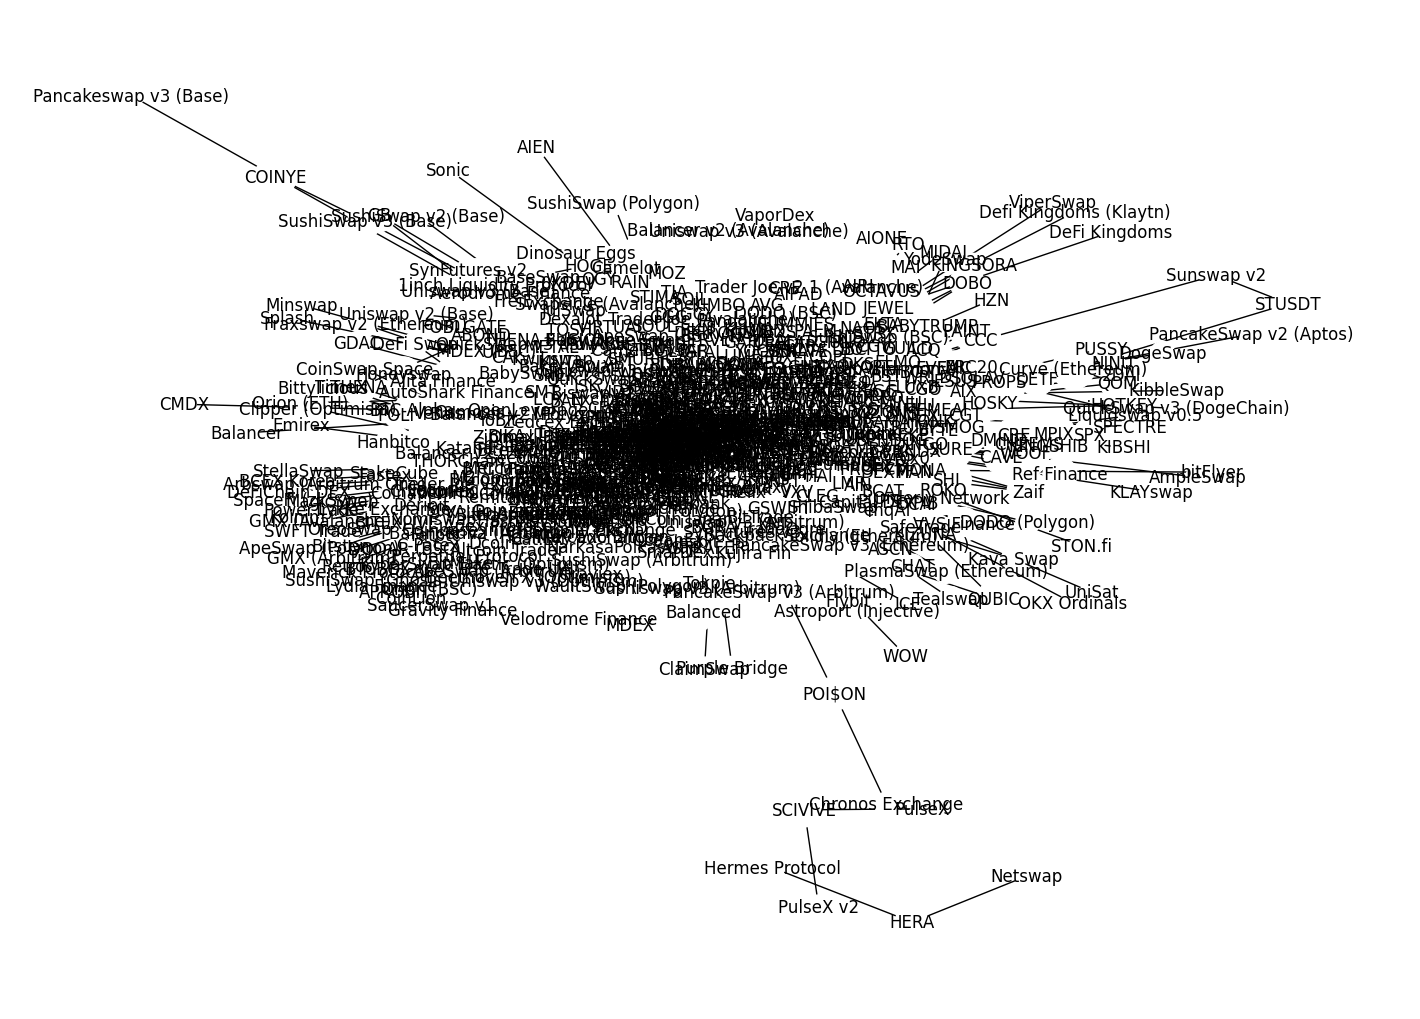

In [61]:
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
d = dict(G.degree)

fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

nx.draw(G, pos, node_color="#fff", 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*300 for k in d])

In [60]:
d.keys().__len__()

42

In [58]:
#fitler a dict just the highest values
d = dict(filter(lambda x: x[1] > 100, d.items()))

#now order
d = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))

In [59]:
d

{'MEXC': 289,
 'Gate.io': 260,
 'LINK': 251,
 'CoinEx': 226,
 'DOGE': 225,
 'AVAX': 188,
 'BitMart': 185,
 'Bitget': 184,
 'BingX': 177,
 'XT.COM': 169,
 'KuCoin': 168,
 'SHIB': 166,
 'SAND': 166,
 'MANA': 156,
 'SNX': 155,
 'AXS': 154,
 'MKR': 148,
 'APE': 148,
 'Bitrue': 147,
 'HTX': 147,
 'NEAR': 141,
 'ExMarkets': 139,
 'GRT': 138,
 'LBank': 130,
 'Poloniex': 130,
 'Bybit': 127,
 'GALA': 126,
 'RNDR': 123,
 'CoinDCX': 122,
 'Uniswap v2': 121,
 'IMX': 121,
 'GMT': 119,
 'AlphaX': 117,
 'FET': 115,
 'ENJ': 112,
 'Hotcoin': 111,
 'Uniswap v3 (Ethereum)': 107,
 'Hotscoin': 106,
 'PEPE': 106,
 'FLOKI': 105,
 'NovaDAX': 103,
 'Crypto.com Exchange': 101}